# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [49]:
# Bibliotecas para visualização de dados
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para manipulação de dados
import pandas as pd

# Bibliotecas para os modelos de machine learning
from sklearn.cluster import KMeans

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler


In [50]:
# Carregando o dataset
df = pd.read_csv("Mall_Customers.csv", delimiter=',')

In [51]:
# Visualizando os dados
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploração e Tratamento dos dados

In [52]:
# Avaliando a coluna Gender
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
# Substituir os valores da coluna 'GENDER' por números específicos utilizando o replace
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\emers\AppData\Local\Temp\ipykernel_15600\2733363575.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [54]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [55]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [56]:
# Verificando os dados nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
# Visualizando as métricas descritivas
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


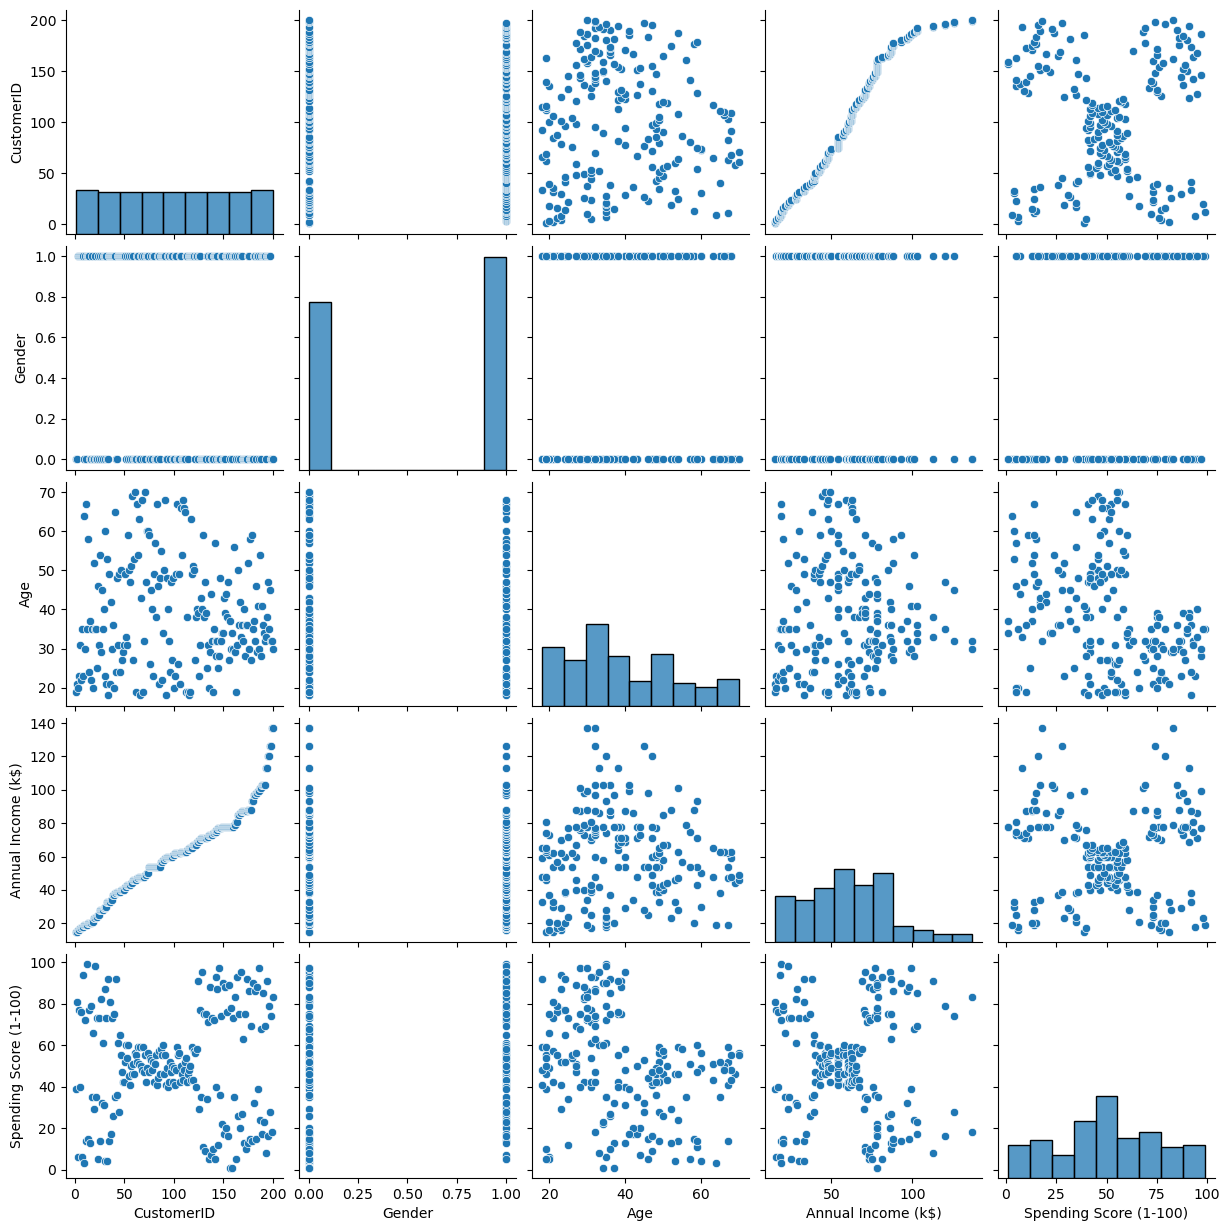

In [58]:
sns.pairplot(df)

Com o pair plot é possível observar alguns padrões interessantes, como a relação entre Spending Score (1-100) e Annual Income (k$) que indica a presença de possíveis agrupamentos de clientes com diferentes perfis de consumo. Já a variável Age não apresenta uma relação clara com o Spending Score, então a idade sozinha, não parecer ser uma boa preditora de gastos. Além disso, como a variável Gender é categórica o pair plot não permite visualizar adequadamente se há diferenças de gasto entre homens e mulheres então vou avaliar com outra visualização.

In [59]:
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',
                 title='Gráfico de Dispersão: Salário Anual (k$) vs. Pontuação de Gastos',
                 labels={'Annual Income (k$)': 'Salário Anual (k$)', 'Spending Score (1-100)': 'Pontuação de Gastos'})

fig.show()

Com base no gráfico de dispersão entre Salário Anual (k$) e Pontuação de Gastos, é possível identificar visualmente cinco segmentos distintos de clientes:

- Clientes com baixo salário e baixo gasto 

- Clientes com baixo salário e alto gasto 

- Clientes com salário médio e gasto médio 

- Clientes com alto salário e baixo gasto 

- Clientes com alto salário e alto gasto 

In [60]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Média da pontuação de gastos por gênero:
Gender
0    48.511364
1    51.526786
Name: Spending Score (1-100), dtype: float64


C:\Users\emers\AppData\Local\Temp\ipykernel_15600\2857350487.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




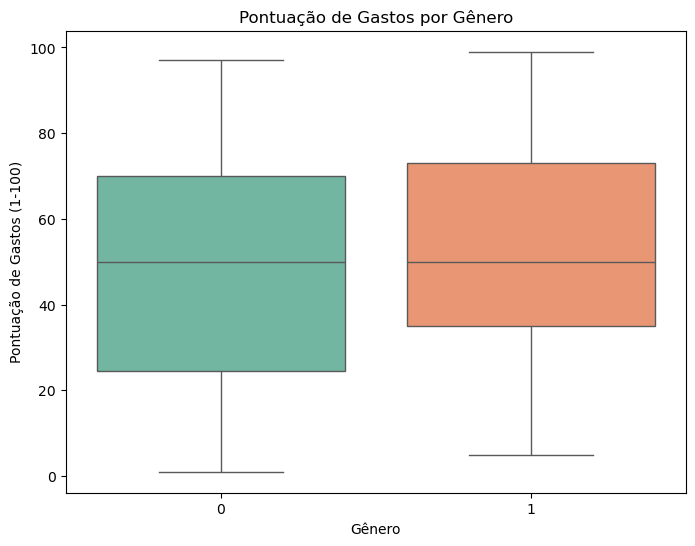

In [61]:
# Verificar a média da pontuação de gastos por gênero
media_por_genero = df.groupby('Gender')['Spending Score (1-100)'].mean()
print("Média da pontuação de gastos por gênero:")
print(media_por_genero)

# Visualização com boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title('Pontuação de Gastos por Gênero')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.xlabel('Gênero')
plt.show()

Pelo gráfico e pelos valores médios observados, podemos concluir que as mulheres tendem a apresentar uma pontuação de gastos ligeiramente maior do que os homens, indicando um perfil de consumo um pouco mais elevado.

In [62]:
df = df.drop(columns=['CustomerID'])

In [63]:
# Padronizando os dados
df_padronizado = df.copy()

In [64]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [65]:
colunas_padronizar = ['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
# Inicializar o StandardScaler
scaler = StandardScaler()
# Ajustar e transformar os dados selecionados
df_padronizado[colunas_padronizar] = scaler.fit_transform(df[colunas_padronizar])

In [66]:
df_padronizado

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


Optei por realizar a padronização porque é o ideal. Padronizar os dados faz com que a escala das variáveis não afete os clusters.

# Implementação do Algoritmo K-Means

In [67]:
kmeans_perfil_gastos = KMeans (n_clusters=5, n_init=10, random_state=42)
kmeans_perfil_gastos.fit(df_padronizado)

c:\Users\emers\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=5, n_init=10, random_state=42)

Optei por utilizar n_clusters=5 porque com base na análise visual consegui identificar que os clientes podem ser divididos em 5 grupos o que parece ser o melhor número de clusters para este caso.
Já o parâmetro n_init=10 escolhi como uma base inicial para o algoritmo, pois irá realizar 10 inicializações diferentes dos centroides para aumentar a eficácia do modelo.
E utilizei random_state=42 para garantir a reprodutibilidade dos resultados.

In [68]:
centroides = kmeans_perfil_gastos.cluster_centers_
centroides

array([[-0.04339047, -0.44191719,  0.99158305,  1.23950275],
       [-0.0166722 , -0.16988908,  1.10528137, -1.25005425],
       [ 0.88640526,  0.78684665, -0.43236199, -0.39327144],
       [ 0.06565965, -1.00061372, -0.79536608,  0.42718095],
       [-1.12815215,  1.21029396, -0.26238756, -0.5213181 ]])

In [69]:
centroides_padronizados = kmeans_perfil_gastos.cluster_centers_  # Centroides padronizados retornados pelo k-means

# Inverter a padronização para obter os centroides originais
centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

array([[ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.55172414, 36.48275862, 89.51724138, 18.        ],
       [ 1.        , 49.81395349, 49.23255814, 40.06976744],
       [ 0.59259259, 24.90740741, 39.72222222, 61.2037037 ],
       [ 0.        , 55.71428571, 53.68571429, 36.77142857]])

# Avaliação e Interpretação dos Resultados

In [70]:
for i, centroide in enumerate(centroides_originais):
    print(f"Cluster {i}:")
    print(f"  Proporção feminina : {centroide[0]:.2f}")
    print(f"  Idade média        : {centroide[1]:.1f} anos")
    print(f"  Renda média        : ${centroide[2]:.1f} mil")
    print(f"  Score de gastos    : {centroide[3]:.1f}/100\n")

Cluster 0:
  Proporção feminina : 0.54
  Idade média        : 32.7 anos
  Renda média        : $86.5 mil
  Score de gastos    : 82.1/100

Cluster 1:
  Proporção feminina : 0.55
  Idade média        : 36.5 anos
  Renda média        : $89.5 mil
  Score de gastos    : 18.0/100

Cluster 2:
  Proporção feminina : 1.00
  Idade média        : 49.8 anos
  Renda média        : $49.2 mil
  Score de gastos    : 40.1/100

Cluster 3:
  Proporção feminina : 0.59
  Idade média        : 24.9 anos
  Renda média        : $39.7 mil
  Score de gastos    : 61.2/100

Cluster 4:
  Proporção feminina : 0.00
  Idade média        : 55.7 anos
  Renda média        : $53.7 mil
  Score de gastos    : 36.8/100



### Análise dos clusters

| Cluster | Descrição                                                                 |
|---------|---------------------------------------------------------------------------|
| **0**   | **Adultos com alta renda e alto gasto**                           |
| **1**   | **Adultos moderadamente ricos e conservadores nos gastos**               |
| **2**   | **Mulheres mais velhas de renda média-baixa e consumo moderado**         |
| **3**   | **Jovens de baixa renda com gastos médios**                              |
| **4**   | **Homens mais velhos de renda média e consumo baixo**                    |


### Análise Inicial

- Clientes com **baixo salário e baixo gasto**
- Clientes com **baixo salário e alto gasto**
- Clientes com **salário médio e gasto médio**
- Clientes com **alto salário e baixo gasto**
- Clientes com **alto salário e alto gasto**

<br>


| Cluster | Perfil Atual                                              | Equivalente na Análise Inicial               | Compatível |
|---------|-----------------------------------------------------------|----------------------------------------------|------------|
| **0**   | Alta renda e alto gasto                                   | Alto salário e alto gasto                    | SIM          |
| **1**   | Alta renda e baixo gasto                                  | Alto salário e baixo gasto                   | SIM          |
| **2**   | Renda média-baixa e consumo moderado (100% feminino)      | Salário médio e gasto médio                  | SIM         |
| **3**   | Baixa renda e gastos médios                               | Baixo salário e alto gasto                   | SIM          |
| **4**   | Renda média e baixo consumo (100% masculino)              | Baixo salário e baixo gasto                  | SIM          |

---


In [71]:
labels = kmeans_perfil_gastos.labels_
labels

array([3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 4, 2, 4, 2, 4, 3, 4, 4, 3, 2, 2, 4, 3,
       2, 2, 3, 3, 4, 2, 2, 2, 4, 3, 2, 4, 3, 2, 4, 4, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 3, 4, 2, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 4, 4,
       4, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 0, 1, 0, 4, 0, 4, 0, 4, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       4, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [72]:
# Criando um df com os dados originais e rótulos de cluster
df_clusters = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': labels.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(df_clusters, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster',
                 color_discrete_sequence=px.colors.qualitative.Set1, opacity=0.7,
                 title='Clusters de Perfil de Gastos')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_originais[:, 2], y=centroides_originais[:, 3],  # Usando apenas Renda e Gasto para os centroides
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')

fig.update_layout(
    xaxis_title='Salário Anual (k$)',
    yaxis_title='Pontuação de Gastos (1-100)',
    legend_title='Cluster'
)

fig.show()


In [73]:
df['cluster'] = labels

In [74]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

In [75]:
medias_por_cluster = df.groupby('cluster')[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

In [76]:
medias_por_cluster

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0.538462,32.692308,86.538462,82.128205
1,0.551724,36.482759,89.517241,18.000000
2,1.000000,49.813953,49.232558,40.069767
3,0.592593,24.907407,39.722222,61.203704
4,0.000000,55.714286,53.685714,36.771429


Cluster 0:
  Proporção feminina : 0.53
  Idade média        : 32.6 anos
  Renda média        : $86.5 mil
  Score de gastos    : 82.1/100
  Análise: Este grupo é formado por clientes  adultos com uma renda alta e alto índice de gastos. Podemos inferir que são consumidores com grande poder aquisitivo e com disposição para gastar, possivelmente em produtos ou serviços premium.

Cluster 1:
  Proporção feminina : 0.55
  Idade média        : 36.4 anos
  Renda média        : $89.5 mil
  Score de gastos    : 18.0/100
  Análise: Clientes deste cluster têm uma renda boa mas são menos gastadores. Podem ser pessoas com uma mentalidade mais cautelosa, possivelmente possuem bom controle financeiro, apesar de estarem em uma faixa etária mais madura e com uma boa capacidade de consumo.

Cluster 2:
  Proporção feminina : 1.00
  Idade média        : 49.8 anos
  Renda média        : $49.2 mil
  Score de gastos    : 40.1/100
  Análise: Este grupo é composto exclusivamente por mulheres de faixa etária mais alta, com uma renda média e gastos moderados. Posso concluir que são consumidoras com um perfil mais reservado, possivelmente priorizando outros gastos, mas ainda assim realizando compras de valor médio uma vez ou outra.

Cluster 3:
  Proporção feminina : 0.59
  Idade média        : 24.9 anos
  Renda média        : $39.7 mil
  Score de gastos    : 61.2/100
  Análise: Jovens adultos com renda mais baixa e gastos mais altos. Posso supor que esses clientes são consumidores mais recentes no mercado de consumo, provavelmente focados em experiências e produtos de baixo custo, como serviços de entretenimento ou moda.

Cluster 4:
  Proporção feminina : 0.00
  Idade média        : 55.7 anos
  Renda média        : $53.7 mil
  Score de gastos    : 36.8/100
  Análise: Grupo exclusivamente composto por homens mais velhos, com uma renda média e pouco gastos. Este grupo provavelmente tem um perfil mais economista, com uma preferência por consumo essencial e produtos de baixo custo.